# MBSE Logical Interface Assistant: 
## Leveraging AI to compose logical interface propoerties 

Welcome to the **MBSE Assistant Notebook**, a powerful tool designed to augment your ability to review, comprehend, and enhance system models with AI-driven support. This notebook integrates a variety of capabilities to assist with:

```
This interface assistance will examine the interface, determine if tagged with PMEIH designation.
    Will use embeddings.
If the interface has no PVGs
    Use AI - Create a CSV with a set of properties and values based on the information of the interface.
    Allow you ability to modify the .csv
    Load the CSV 
else 
    AI-Comment on the current property values.
    Load current in CSV.
    Allow you ability to modify the CSV
    Update the CSV values.
end


### Model-Specific Code (Do Not Modify)

This section contains code that is specific to the system model. It is updated only when the model is changed and should not require user modifications under normal circumstances.

If a new model is introduced, ensure this section is reviewed and updated as needed.


In [1]:
#!pip install --upgrade git+https://github.com/tkSDISW/Capella_Tools 
import capellambse.decl

from capella_tools import capellambse_helper


from IPython import display as diag_display
resources = {
    "HBTurboFan": "HBTurbFan/High Bypass Turbo Fan",
}
path_to_model = "../High Bypass Turbo Fan.aird"
model = capellambse.MelodyModel(path_to_model, resources=resources)


## 🔄 Embedding Generation Process

### Overview
This section generates embeddings, which streamlines processing and analyzing the model. The embeddings provide a structured representation of the data that powers subsequent tasks and visualizations.

##

In [2]:

from capella_tools  import capella_embeddings_manager

# Generate embeddings for all objects
model_embedding_manager = capella_embeddings_manager.EmbeddingManager()

embedding_file = "embeddings.json" 
model_embedding_manager.set_files( path_to_model , embedding_file)

model_embedding_manager.create_model_embeddings(model)

OpenAI API Key retrieved successfully.
Loading embeddings
embeddings loaded.


## 🎯 Prompt for System Model Element Analysis

### Purpose
This cell accepts a prompt to identify and isolate the specific object(s) to be analyzed. Providing detailed and accurate information in the prompt will ensure the best performance during the analysis.

### What to Include in Your Prompt
For optimal results, specify the following details about the object(s):
1. **Type of ARCADIA Object:** Clearly state the type of the object (e.g., Logical Component, Physical Component, Functional Exchange).
2. **Name of the Object:** Provide the exact name of the object as defined in the model.
3. **ARCADIA Phase:** Specify the phase associated with the object (e.g., Operational Analysis, System Analysis, Logical Architecture, Physical Architecture).
4. **Related Objects:** Identify any objects connected via exchanges or dependencies.


In [3]:
#selected_objects  = model_embedding_manager.interactive_query_and_selection()

from jupyter_ui_poll import ui_events
import time

# Start interactive selection
model_embedding_manager.interactive_query_and_selection_widgets()

# Retrieve the selection after submission
selected_objects = model_embedding_manager.get_selected_objects()



Waiting for selection...


## 📝 Generate Structured Input File 

### Purpose
This cell generates a structured structured input file, `capella_model.yaml`, which serves as input for prompts tailored to the object type of the last selected item. This ensures that the prompt aligns with the model's structure and provides accurate context for analysis.



In [4]:
#Workflow
from capella_tools import capellambse_yaml_manager
yaml_handler = capellambse_yaml_manager.CapellaYAMLHandler()
   
#Generate YAML for the logical component and append to the file
for object in  selected_objects : 
    yaml_handler.generate_yaml(model.by_uuid(object["uuid"]))  





#yaml_handler.display()
yaml_handler.generate_yaml_referenced_objects()
#yaml_handler.display()

yaml_handler.write_output_file()


## 🖼️ Generate Contextual Diagram

### Purpose
This cell generates a **contextual diagram** for the selected object. The diagram visually represents the object's relationships and interactions, providing a clear and comprehensive view of its context within the model.


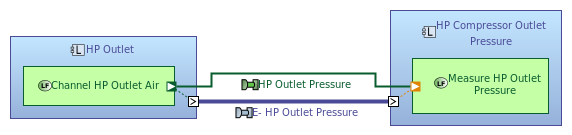

In [5]:
for object in  selected_objects : 
    #print(object)
    if object["type"] == "Diagram" :
        diagram = model.by_uuid(object["uuid"])
        #display(diagram)
    else:
        obj = model.by_uuid(object["uuid"])
        capellambse_helper.display_context_diagram(obj)

## 💬 Predefined Prompts for Analysis

### Purpose
This cell contains predefined prompts for analyzing different types of ARCADIA elements, including components, functions, operational processes, and a default prompt. You can use these as-is or tailor them to suit your specific needs.



In [6]:
component_prompt = """
Please analyze the yaml file and display the result as .html and specifically provide insights on:
1. The purpose of the component.
2. Any components that make it up.
3. A list of allocated functions and their potential roles.
4. How the ports relate to the functions.
5. Any traceabilty artifacts linked to the component and the artifacts url.
6. Suggestions for improving the component description.
7. Create a tabular table with columns for the component and its ports and the port interfaces, the interface souce and the interface target.
8. List any property values and the related model element.
9. A summary of any related state machines.
"""
component_exchange_prompt = """
Please analyze the yaml file and display the result as .html and specifically provide insights on:
1. The purpose of the component exchange.
2. A list of allocated functions exchanges and their potential roles.
3. Related functional chains
5. Any traceabilty artifacts linked to the component and the artifacts url.
6. Suggestions for improving the component exchange name and decription.
"""

function_prompt = """
Please analyze the yaml file and display the result as .html specifically provide insights on:
1. The purpose of the function.
2. Its owning component.
4. Any ports relate to the functions.
5. Any traceabilty artifacts linked to the component and the artifacts url.
6. Suggestions for improving the function description.
7. Create a tabular table with columns for the owning component, this function, its ports and the functional exchanges.
"""
activity_prompt = """
Please analyze the yaml file and display the result as .html specifically provide insights on:
1. The purpose of the activity.
2. Its actor or entiry.
4. Any traceabilty artifacts linked to the component and the artifacts url.
7. Suggestions for improving the activity description.
7. Create a tabular table with columns for the owning entity or actor, this activity, its exchanges.
"""
functional_chain_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the functional chain.
2. A table with first column being the owning component, the second being a function, last column being involved functional exchange, organized by involved functional exchanges.
3. Any traceabilty artifacts linked to functional chain, functions, owning component and the traceability artifacts url.
4. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""
operational_process_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the operation process.
2. A table with first column being the owning component, the second being a activities, last column being involved activity exchange, organized by involved activity exchanges.
3. Any traceabilty artifacts linked to the operational process chain, activities, owning component and the traceability artifacts url.
4. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""
diagram_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the diagram based on its related nodes.
2. Describe what the nodes represent in the ARCADIA method and what the diagram is describing.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""
default_prompt = """
Please analyze the YAML file and display the result as .html specifically provide insights on:
1. The purpose of the primary component listed first in the yaml file.=.
2. List any property values and the related model element.
Please format the analysis in .html suitable for Juypter Notbook display operation.
"""



## ⚙️ Execute Default Prompts

### Purpose
This cell executes the **default prompts** defined for analyzing the model. These prompts are designed to provide general insights and overviews when specific object types or contexts are not explicitly defined.

### What This Cell Does
- Reads the structured input file (e.g., `capella_model.yaml`).
- Uses the default prompts to query key details about the selected object(s).
- Outputs the results directly in the notebook.

### 🛠️ Instructions
1. Ensure the `capella_model.yaml` file is generated and up-to-date.
2. Run this cell to execute the default prompts.
3. Review the output to verify the accuracy and relevance of the analysis.

### 📝 Notes
- The default prompts are **general-purpose** and may not capture all details specific to certain object types.
- For more tailored analysis, consider using prompts designed for specific ARCADIA elements.

> 💡 **Tip:** Use the default prompts as a starting point, then refine or modify them based on your analysis needs.


In [7]:
import os
from openai import OpenAI
from IPython.core.display import HTML
from IPython.display import display, clear_output, Markdown
#from capella_tools  import Open_AI_RAG_manager

from capella_tools import Open_AI_RAG_manager
#print(object)
if object["type"] ==  "LogicalComponent" or object["type"] ==  "SystemComponent" or object["type"] ==  "PhysicalComponent-BEHAVIOR"  or object["type"] ==  "PhysicalComponent-NODE" :
    prompt = component_prompt
elif object["type"] ==  "FunctionalChain" :  
    prompt = functional_chain_prompt
elif object["type"] ==  "OperationalProcess":  
    prompt = functional_chain_prompt
elif object["type"] ==  "SystemFuntion" or object["type"] ==  "LogicalFunction" or object["type"] ==  "PhysicalFunction":
    prompt = function_prompt
elif object["type"] ==  "OperationalActivity" : 
    prompt = activity_prompt
elif object["type"] ==  "Diagram" : 
    prompt = diagram_prompt
elif object["type"] ==  "ComponentExchange" : 
    prompt = component_exchange_prompt
else :
    prompt = default_prompt    


# Step 1: Get YAML content
yaml_content = yaml_handler.get_yaml_content()

# Step 2: Invoke ChatGPT for analysis
analyzer = Open_AI_RAG_manager.ChatGPTAnalyzer(yaml_content)
analyzer.initial_prompt(prompt)
chatgpt_response = analyzer.get_response()


OpenAI API Key retrieved successfully.


**Your prompt:** 
Please analyze the yaml file and display the result as .html and specifically provide insights on:
1. The purpose of the component exchange.
2. A list of allocated functions exchanges and their potential roles.
3. Related functional chains
5. Any traceabilty artifacts linked to the component and the artifacts url.
6. Suggestions for improving the component exchange name and decription.
 Format the response in .html format.

**Token Usage Info:**

Tokens used: prompt=507, completion=601, total=1108

## ⚙️ Execute Followup Prompts

### Purpose
This cell executes the **follow up prompts** defined for analyzing the model. These prompts can be added by the note book user in addition to the default prompts

### What This Cell Does
- Use the structured input file (e.g., `capella_model.yaml`).
- Excutes the prompt defined in the cell.
- Outputs the results directly in the notebook.

### 🛠️ Instructions
1. Ensure the `capella_model.yaml` file is generated and up-to-date.
2. Run this cell to execute the default prompts.
3. Review the output to verify the accuracy and relevance of the analysis.

> 💡 **Tip:** Modify the promt to your needs.

In [8]:
prompt = '''
Examine the component exchange that is primary object. It name is going to classify the interface as either PMEIH, Physical, Mechanical, Electrical/Electroinc, or Hydarulic.
If the name starts with an E- propose a set of electical properties for the interface based on the content of the yaml file and general knowlege
If the name starts with an M- propose a set of mechanical properties for the interface based on the content of the yaml file and general knowlege 
If the name starts with an P- propose a set of Physical properties for the interface based on the content of the yaml file and general knowlege
If the name starts with an H- propose a set of Hydraulic properties for the interface based on the content of the yaml file and general knowlege
If the name starts with an I- propose a set of Information of Data properties for the interface based on the content of the yaml file.
If the name does not have either E-, M-, P-, H-, I- propose a set based on yaml and general knowlege. 
Format the response in CSV, include no extra text, or prefix for csv in response. Include column for name, description, value, units
'''
analyzer.follow_up_prompt(prompt)

chatgpt_response = analyzer.get_response()
analyzer.save_to_csv("proposed_property_values.csv",chatgpt_response)


**Your prompt:** 
Examine the component exchange that is primary object. It name is going to classify the interface as either PMEIH, Physical, Mechanical, Electrical/Electroinc, or Hydarulic.
If the name starts with an E- propose a set of electical properties for the interface based on the content of the yaml file and general knowlege
If the name starts with an M- propose a set of mechanical properties for the interface based on the content of the yaml file and general knowlege 
If the name starts with an P- propose a set of Physical properties for the interface based on the content of the yaml file and general knowlege
If the name starts with an H- propose a set of Hydraulic properties for the interface based on the content of the yaml file and general knowlege
If the name starts with an I- propose a set of Information of Data properties for the interface based on the content of the yaml file.
If the name does not have either E-, M-, P-, H-, I- propose a set based on yaml and general knowlege. 
Format the response in CSV, include no extra text, or prefix for csv in response. Include column for name, description, value, units


**Response:**

```csv
"name","description","value","units"
"Voltage Level","Typical voltage level required for HP Outlet Pressure data exchange","5","V"
"Current Rating","Expected current flow for the interface","50","mA"
"Signal Type","Nature of signal used in pressure data exchange","Digital",""
"Connector Type","Compatible connector type for electrical interfacing","Sub-D",""
"Cable Type","Recommended cable type for stable electrical connection","Twisted Pair",""
"Frequency Range","Operating frequency range of the electrical signals","20-100","kHz"
"Insulation Resistance","Required insulation resistance for safety and performance","100","MΩ"
"Shielding","Shielding to minimize interference","Foil",""


**Token Usage Info:**

Tokens used: prompt=1362, completion=147, total=1509

✅ CSV file saved: /home/simcenter/studio/HBTurboFan/High Bypass Turbo Fan/Notebooks/proposed_property_values.csv


## 💬 Launch Interactive Chat on Structured Input

### Purpose
This cell launches an interactive chat session based on the structured input file, leveraging ARCADIA and Polarion terminology to ensure the analysis remains consistent with the modeling context.

### Key Features
- Uses the generated structured input file (e.g., `capella_model.yaml`) to guide the conversation.
- Supports ARCADIA terms such as **functions**, **components**, **activities**, and **exchanges**.
- Incorporates Polarion terms like **workitem**, **requirement**, and **traceability** for seamless integration with requirements management workflows.

### How It Works
1. The structured input file provides context for the chat session.
2. You can interactively query details about the model elements, relationships, and dependencies.
3. Responses are tailored using ARCADIA and Polarion terminology.

### Example Prompts
- **For ARCADIA:**
  ```plaintext
  What are the dependencies and exchanges for the selected function in the Logical Architecture phase?

- **For Polarion:**
  ```plaintext
  Provide the traceability matrix for the workitem linked to this component.
  ```
### 🛠️ Instructions
1. Ensure the `capella_model.yaml` file has been generated and is up-to-date.
2. Run this cell to start the interactive chat session.
3. Enter your queries using **ARCADIA** or **Polarion** terms for accurate and relevant responses.

### 📝 Notes
- The interactive chat dynamically adapts to the content in the structured input file.
- Use precise and contextual queries to ensure the best results and insights.

> 💡 **Tip:** If you're unfamiliar with ARCADIA or Polarion terminology, consult the respective documentation or glossary for guidance.



In [ ]:
analyzer.interactive_chat()


Starting interactive chat...


Output()

Textarea(value='', layout=Layout(border_bottom='2px solid #4A90E2', border_left='2px solid #4A90E2', border_ri…

Dropdown(description='Load file:', layout=Layout(width='auto'), options=('', 'embeddings.json', 'capella_model…

Waiting for chat interactions...


In [ ]:
print("Done")

# 